# Proyecto Hackaton

##  Importar, limpiar y analizar los datos del dataset

### Inicializacion

In [1]:
# Importar librerias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Cargar el archivo CSV
data = pd.read_csv('Online_Retail.csv', encoding='ISO-8859-1')

In [3]:
# Mostrar las primeras filas del DataFrame
data.sample(20)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
260436,559812,21240,BLUE POLKADOT CUP,2,12/07/2020 15:29,0.85,15051.0,United Kingdom
33052,539217,22558,CLOTHES PEGS RETROSPOT PACK 24,24,16/12/2019 12:46,1.49,15394.0,United Kingdom
406852,571837,23196,VINTAGE LEAF MAGNETIC NOTEPAD,1,19/10/2020 12:11,1.45,16470.0,United Kingdom
188790,553061,23202,JUMBO BAG VINTAGE LEAF,1,13/05/2020 11:12,2.08,17238.0,United Kingdom
306244,563745,21395,BLUE POLKADOT BEAKER,48,19/08/2020 09:38,0.39,15159.0,United Kingdom
313776,564536,47586A,PINK FAIRY CAKE CUSHION COVER,4,25/08/2020 15:12,2.55,13159.0,United Kingdom
106018,545304,22084,PAPER CHAIN KIT EMPIRE,6,01/03/2020 12:51,2.95,16212.0,United Kingdom
208721,555147,85049E,SCANDINAVIAN REDS RIBBONS,12,31/05/2020 15:41,1.25,13505.0,Switzerland
273821,560862,21071,VINTAGE BILLBOARD DRINK ME MUG,6,21/07/2020 13:48,1.25,14085.0,United Kingdom
233143,557442,22746,POPPY'S PLAYHOUSE LIVINGROOM,2,20/06/2020 12:53,2.10,14808.0,United Kingdom


In [4]:
# Obtener información general sobre el DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


### Detección de valores nulos

In [5]:
# Contar los valores nulos por columna
null_counts = data.isnull().sum()
print("Valores nulos por columna:")
print(null_counts)

Valores nulos por columna:
INVOICE_NO           0
STOCK_CODE           0
DESCRIPTION       1454
QUANTITY             0
INVOICE_DATE         0
UNIT_PRICE           0
CUSTOMER_ID     135080
REGION               0
dtype: int64


In [6]:
# Eliminar filas con CUSTOMER_ID nulo
data = data.dropna(subset=['CUSTOMER_ID'])

# Reemplazar valores nulos en DESCRIPTION por "No description"
data['DESCRIPTION'].fillna('No description', inplace=True)

# Verificar que no haya más valores nulos
print("Valores nulos después del procesamiento:")
print(data.isnull().sum())

Valores nulos después del procesamiento:
INVOICE_NO      0
STOCK_CODE      0
DESCRIPTION     0
QUANTITY        0
INVOICE_DATE    0
UNIT_PRICE      0
CUSTOMER_ID     0
REGION          0
dtype: int64


In [7]:
# Mostrar la informacion del conjunto de datos limpio
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    406829 non-null  object 
 1   STOCK_CODE    406829 non-null  object 
 2   DESCRIPTION   406829 non-null  object 
 3   QUANTITY      406829 non-null  int64  
 4   INVOICE_DATE  406829 non-null  object 
 5   UNIT_PRICE    406829 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


### Eliminar valores duplicados

In [8]:
# Contar los registros duplicados en el conjunto de datos data
duplicates_count = data.duplicated().sum()
print("Cantidad de registros duplicados:", duplicates_count)

Cantidad de registros duplicados: 5225


In [9]:
# Eliminar duplicados en el conjunto de datos data
data.drop_duplicates(inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    401604 non-null  object 
 1   STOCK_CODE    401604 non-null  object 
 2   DESCRIPTION   401604 non-null  object 
 3   QUANTITY      401604 non-null  int64  
 4   INVOICE_DATE  401604 non-null  object 
 5   UNIT_PRICE    401604 non-null  float64
 6   CUSTOMER_ID   401604 non-null  float64
 7   REGION        401604 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.6+ MB


### Identificar y eliminar cantidades negativas

In [10]:
# Verificar qué columnas tienen cantidades negativas
negative_quantities = data[data['QUANTITY'] < 0]

# Contar las cantidades negativas por columna
negative_quantities_count = negative_quantities['QUANTITY'].count()

print("Cantidad de registros con cantidades negativas:", negative_quantities_count)
print("\nEjemplos de registros con cantidades negativas:")
negative_quantities.head(10)

Cantidad de registros con cantidades negativas: 8872

Ejemplos de registros con cantidades negativas:


,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
141,C536379,D,Discount,-1,01/12/2019 09:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,01/12/2019 09:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,01/12/2019 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
238,C536391,21980,PACK OF 12 RED RETROSPOT TISSUES,-24,01/12/2019 10:24,0.29,17548.0,United Kingdom
239,C536391,21484,CHICK GREY HOT WATER BOTTLE,-12,01/12/2019 10:24,3.45,17548.0,United Kingdom
240,C536391,22557,PLASTERS IN TIN VINTAGE PAISLEY,-12,01/12/2019 10:24,1.65,17548.0,United Kingdom
241,C536391,22553,PLASTERS IN TIN SKULLS,-24,01/12/2019 10:24,1.65,17548.0,United Kingdom
939,C536506,22960,JAM MAKING SET WITH JARS,-6,01/12/2019 12:38,4.25,17897.0,United Kingdom


In [11]:
# Eliminar filas con cantidades negativas
data = data[data['QUANTITY'] >= 0]
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    392732 non-null  object 
 1   STOCK_CODE    392732 non-null  object 
 2   DESCRIPTION   392732 non-null  object 
 3   QUANTITY      392732 non-null  int64  
 4   INVOICE_DATE  392732 non-null  object 
 5   UNIT_PRICE    392732 non-null  float64
 6   CUSTOMER_ID   392732 non-null  float64
 7   REGION        392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


### Cambiar los nombres de las columnas a minusculas

In [12]:
# Convertir los nombres de las columnas a minúsculas
data.columns = data.columns.str.lower()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   invoice_no    392732 non-null  object 
 1   stock_code    392732 non-null  object 
 2   description   392732 non-null  object 
 3   quantity      392732 non-null  int64  
 4   invoice_date  392732 non-null  object 
 5   unit_price    392732 non-null  float64
 6   customer_id   392732 non-null  float64
 7   region        392732 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.0+ MB


### Convertir tipos de datos de las columnas

In [13]:
# Convertir CUSTOMER_ID a tipo objeto (cadena de caracteres)
data['customer_id'] = data['customer_id'].astype('str')

# Convertir INVOICE_DATE a tipo datetime
data['invoice_date'] = pd.to_datetime(data['invoice_date'], format='%d/%m/%Y %H:%M')

# Mostrar los tipos de datos actualizados
data.dtypes

invoice_no              object
stock_code              object
description             object
quantity                 int64
invoice_date    datetime64[ns]
unit_price             float64
customer_id             object
region                  object
dtype: object

### Agregar la variable Monto

In [14]:
# Calcular la columna 'amount' como cantidad * precio unitario
data['amount'] = data['quantity'] * data['unit_price']
data.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Eliminar variables no necesarias para el desarrollo del modelo

In [15]:
# Eliminar las columnas STOCK_CODE, DESCRIPTION y UNIT_PRICE
data.drop(['stock_code', 'description', 'unit_price'], axis=1, inplace=True)
data.head()

,invoice_no,quantity,invoice_date,customer_id,region,amount
0,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,15.30
1,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34
2,536365,8,2019-12-01 08:26:00,17850.0,United Kingdom,22.00
3,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34
4,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34


## Analisis Exploratorio de Datos (EDA)

### Resumen Estadistico Variables Numericas

In [16]:
# Resumen estadístico básico de las variables numéricas
summary_stats = data.describe().T

# Mostrar el resumen estadístico básico
print("Resumen estadístico básico:")
summary_stats

Resumen estadístico básico:


,count,mean,std,min,25%,50%,75%,max
quantity,392732.0,13.153718,181.588420,1.0,2.00,6.00,12.0,80995.0
amount,392732.0,22.629195,311.083465,0.0,4.95,12.39,19.8,168469.6


### Analisis Número de Facturas por País

In [17]:
# Conteo de facturas por país (region)
facturas_por_pais = data.groupby('region')['invoice_no'].nunique().reset_index()
facturas_por_pais.columns = ['Region', 'Numero de Facturas']

# Ordenar por mayor número de facturas
facturas_por_pais = facturas_por_pais.sort_values(by='Numero de Facturas', ascending=False)

# Mostrar tabla de número de facturas por país ordenado
print("Número de facturas por país (ordenado por mayor número de facturas):")
facturas_por_pais

Número de facturas por país (ordenado por mayor número de facturas):


,Region,Numero de Facturas
35,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
23,Netherlands,95
30,Spain,90
0,Australia,57
26,Portugal,57
32,Switzerland,51


### Analisis Monto Total por País

In [18]:
# Agrupar por país y calcular el monto total por país
monto_total_por_pais = data.groupby('region')['amount'].sum().reset_index()
monto_total_por_pais.columns = ['País', 'Monto Total']

# Ordenar por monto total descendente
monto_total_por_pais = monto_total_por_pais.sort_values(by='Monto Total', ascending=False)

# Mostrar tabla de monto total por país
print("Monto total por país:")
monto_total_por_pais

Monto total por país:


,País,Monto Total
35,United Kingdom,7.285025e+06
23,Netherlands,2.854463e+05
10,EIRE,2.652625e+05
14,Germany,2.286784e+05
13,France,2.089343e+05
0,Australia,1.384538e+05
30,Spain,6.155856e+04
32,Switzerland,5.644395e+04
3,Belgium,4.119634e+04
31,Sweden,3.836783e+04


### Analisis Numero de Facturas por mes

In [19]:
# Crear una nueva columna 'Month' para el mes de cada factura
data['Month'] = data['invoice_date'].dt.month

# Conteo de facturas por mes
facturas_por_mes = data.groupby('Month')['invoice_no'].nunique().reset_index()
facturas_por_mes.columns = ['Mes', 'Número de Facturas']

# Mostrar tabla de número de facturas por mes
print("Número de facturas generadas por mes:")
facturas_por_mes

Número de facturas generadas por mes:


,Mes,Número de Facturas
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


### Analisis de la Cantidad de Clientes Nuevos por mes

In [20]:
# Ordenar los datos por fecha de factura
data = data.sort_values(by='invoice_date')

# Encontrar la primera compra de cada cliente
primer_compra_por_cliente = data.groupby('customer_id')['invoice_date'].min().reset_index()

# Crear una nueva columna 'month_first_purchase' para el mes de la primera compra de cada cliente
primer_compra_por_cliente['month_first_purchase'] = primer_compra_por_cliente['invoice_date'].dt.month

# Contar la cantidad de clientes nuevos por mes
clientes_nuevos_por_mes = primer_compra_por_cliente.groupby('month_first_purchase').size().reset_index()
clientes_nuevos_por_mes.columns = ['Mes', 'Clientes Nuevos']

# Mostrar tabla de cantidad de clientes nuevos por mes
print("Cantidad de clientes nuevos por mes:")
clientes_nuevos_por_mes

Cantidad de clientes nuevos por mes:


,Mes,Clientes Nuevos
0,1,417
1,2,380
2,3,452
3,4,300
4,5,284
5,6,242
6,7,188
7,8,169
8,9,299
9,10,358


### Analisis del monto total de ventas por mes

In [21]:
# Calcular el monto total de ventas por mes
ventas_por_mes = data.groupby('Month')['amount'].sum().reset_index()
ventas_por_mes.columns = ['Mes', 'Monto Total de Ventas']

# Mostrar tabla de monto total de ventas por mes
print("Monto total de ventas por mes:")
ventas_por_mes

Monto total de ventas por mes:


,Mes,Monto Total de Ventas
0,1,568101.310
1,2,446084.920
2,3,594081.760
3,4,468374.331
4,5,677355.150
5,6,660046.050
6,7,598962.901
7,8,644051.040
8,9,950690.202
9,10,1035642.450


### Analisis de Clientes que mas han gastado

In [22]:
# Calcular el total gastado por cada cliente
total_gastado_por_cliente = data.groupby('customer_id')['amount'].sum().reset_index()

# Ordenar los clientes por el monto total gastado de mayor a menor
clientes_mas_gastadores = total_gastado_por_cliente.sort_values(by='amount', ascending=False)

# Mostrar los 10 clientes que más han gastado
print("Clientes que más han gastado:")
clientes_mas_gastadores.head(10)

Clientes que más han gastado:


,customer_id,amount
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194390.79
3009,16446.0,168472.50
1880,14911.0,143711.17
55,12415.0,124914.53
1334,14156.0,117210.08
3772,17511.0,91062.38
2703,16029.0,80850.84
0,12346.0,77183.60


### Analisis de clientes que mas compras han realizado

In [23]:
# Calcular el número de compras por cliente
compras_por_cliente = data.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Ordenar los clientes por el número de compras de mayor a menor
clientes_mas_compras = compras_por_cliente.sort_values(by='invoice_no', ascending=False)

# Mostrar los 10 clientes que más compras han realizado
print("Clientes que más compras han realizado:")
clientes_mas_compras.head(10)

Clientes que más compras han realizado:


,customer_id,invoice_no
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93
2177,15311.0,91
481,12971.0,86
1690,14646.0,74
2703,16029.0,63
796,13408.0,62


In [24]:
clientes_mas_compras.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4339 entries, 326 to 0
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   customer_id  4339 non-null   object
 1   invoice_no   4339 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 101.7+ KB


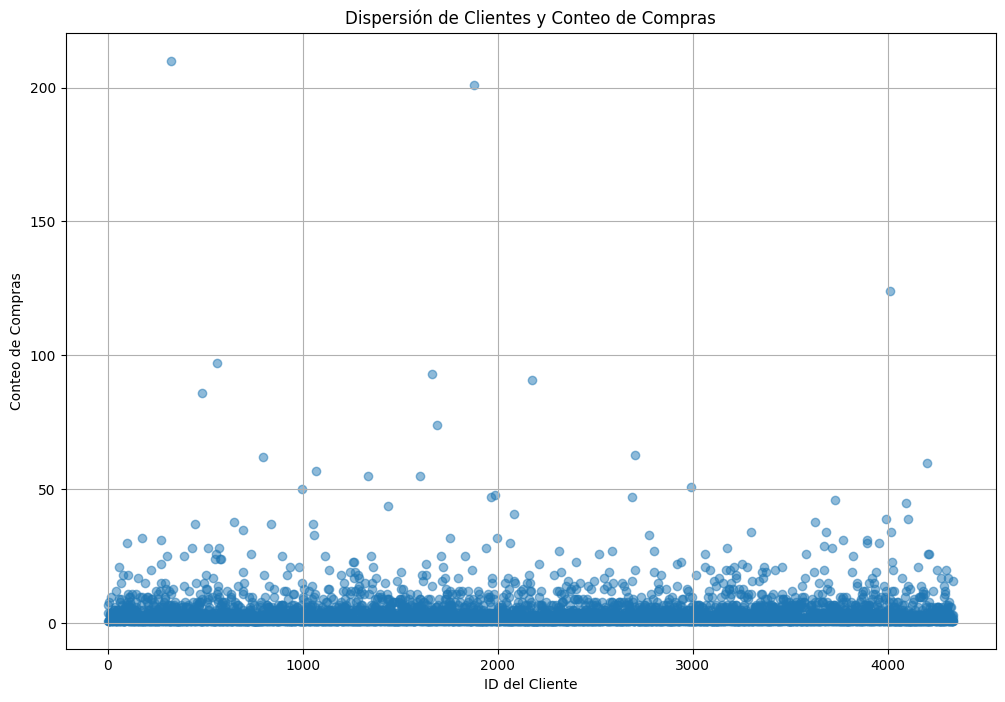

In [25]:
plt.figure(figsize=(12, 8))
plt.scatter(clientes_mas_compras.index, clientes_mas_compras['invoice_no'], alpha=0.5)
plt.title('Dispersión de Clientes y Conteo de Compras')
plt.xlabel('ID del Cliente')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.show()

In [26]:
print(np.percentile(clientes_mas_compras['invoice_no'],[90,95,99]))

[ 9. 13. 30.]


No más del 1% de clientes tiene más de 30 compras y menos del 5% tiene más de 13 compras. Es decir que todos aquellos puntos que vemos en el gráfico por encima de 30 pedidos, son datos con anomalías.

### Analisis de comportamiento de clientes a lo largo del tiempo

In [27]:
data.head(20)

,invoice_no,quantity,invoice_date,customer_id,region,amount,Month
0,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,15.30,12
1,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12
2,536365,8,2019-12-01 08:26:00,17850.0,United Kingdom,22.00,12
3,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12
4,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12
5,536365,2,2019-12-01 08:26:00,17850.0,United Kingdom,15.30,12
6,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,25.50,12
7,536366,6,2019-12-01 08:28:00,17850.0,United Kingdom,11.10,12
8,536366,6,2019-12-01 08:28:00,17850.0,United Kingdom,11.10,12
24,536368,3,2019-12-01 08:34:00,13047.0,United Kingdom,14.85,12


In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   quantity      392732 non-null  int64         
 2   invoice_date  392732 non-null  datetime64[ns]
 3   customer_id   392732 non-null  object        
 4   region        392732 non-null  object        
 5   amount        392732 non-null  float64       
 6   Month         392732 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(2), object(3)
memory usage: 24.0+ MB


In [29]:
# Agregamos columnas de fecha para facilitar el agrupamiento
data['date'] = data['invoice_date'].dt.date
data['week'] = data['invoice_date'].astype('datetime64[W]')
data['month'] = data['invoice_date'].astype('datetime64[M]')

In [30]:
data

,invoice_no,quantity,invoice_date,customer_id,region,amount,Month,date,week,month
0,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,15.30,12,2019-12-01,2019-11-28,2019-12-01
1,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12,2019-12-01,2019-11-28,2019-12-01
2,536365,8,2019-12-01 08:26:00,17850.0,United Kingdom,22.00,12,2019-12-01,2019-11-28,2019-12-01
3,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12,2019-12-01,2019-11-28,2019-12-01
4,536365,6,2019-12-01 08:26:00,17850.0,United Kingdom,20.34,12,2019-12-01,2019-11-28,2019-12-01
...,...,...,...,...,...,...,...,...,...,...
541896,581587,12,2020-12-09 12:50:00,12680.0,France,19.80,12,2020-12-09,2020-12-03,2020-12-01
541895,581587,12,2020-12-09 12:50:00,12680.0,France,19.80,12,2020-12-09,2020-12-03,2020-12-01
541907,581587,4,2020-12-09 12:50:00,12680.0,France,16.60,12,2020-12-09,2020-12-03,2020-12-01
541900,581587,4,2020-12-09 12:50:00,12680.0,France,15.00,12,2020-12-09,2020-12-03,2020-12-01


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   quantity      392732 non-null  int64         
 2   invoice_date  392732 non-null  datetime64[ns]
 3   customer_id   392732 non-null  object        
 4   region        392732 non-null  object        
 5   amount        392732 non-null  float64       
 6   Month         392732 non-null  int64         
 7   date          392732 non-null  object        
 8   week          392732 non-null  datetime64[ns]
 9   month         392732 non-null  datetime64[ns]
dtypes: datetime64[ns](3), float64(1), int64(2), object(4)
memory usage: 33.0+ MB


In [32]:
users_per_week = data.groupby('week')['customer_id'].nunique()

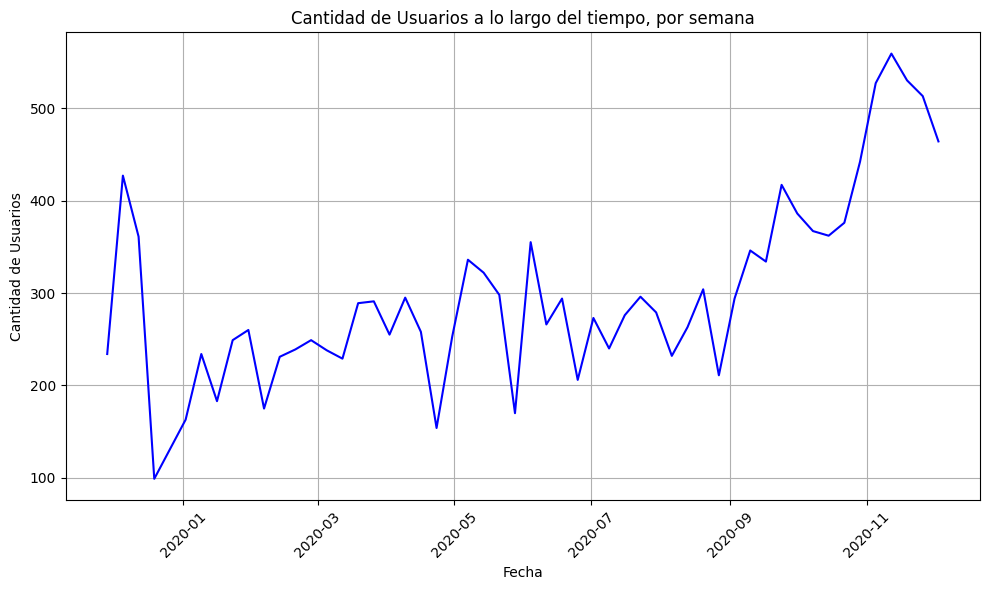

In [33]:
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por semana
plt.figure(figsize=(10, 6))
plt.plot(users_per_week, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El comportamiento es muy fluctuante, con tendencia a incrementar para finales de año, como bien sabemos, es la temporada en el que la gente modifica su comportamiento de compras.

### Analisis de comportamiento de facturas a lo largo del tiempo

In [34]:
# Supongamos que 'data' es tu dataframe original
data['date'] = pd.to_datetime(data['date'])

# Contar el número de pedidos por día
invoices_per_day = data.groupby('date')['invoice_no'].nunique()

# Contar el número de pedidos por semana
invoices_per_week = data.groupby('week')['invoice_no'].nunique()


# Contar el número de pedidos por mes
invoices_per_month = data.groupby('month')['invoice_no'].nunique()

In [35]:
invoices_per_day

date
2019-12-01    121
2019-12-02    137
2019-12-03     57
2019-12-05     87
2019-12-06     94
             ... 
2020-12-05    116
2020-12-06    110
2020-12-07    104
2020-12-08    113
2020-12-09     41
Name: invoice_no, Length: 305, dtype: int64

In [36]:
print("Promedio de pedidos por día:\n", invoices_per_day.mean())
print("\nPromedio de pedidos por semana:\n", invoices_per_week.mean())
print("\nPromedio de pedidos por mes:\n", invoices_per_month.mean())


Promedio de pedidos por día:
 60.773770491803276

Promedio de pedidos por semana:
 349.7358490566038

Promedio de pedidos por mes:
 1425.8461538461538


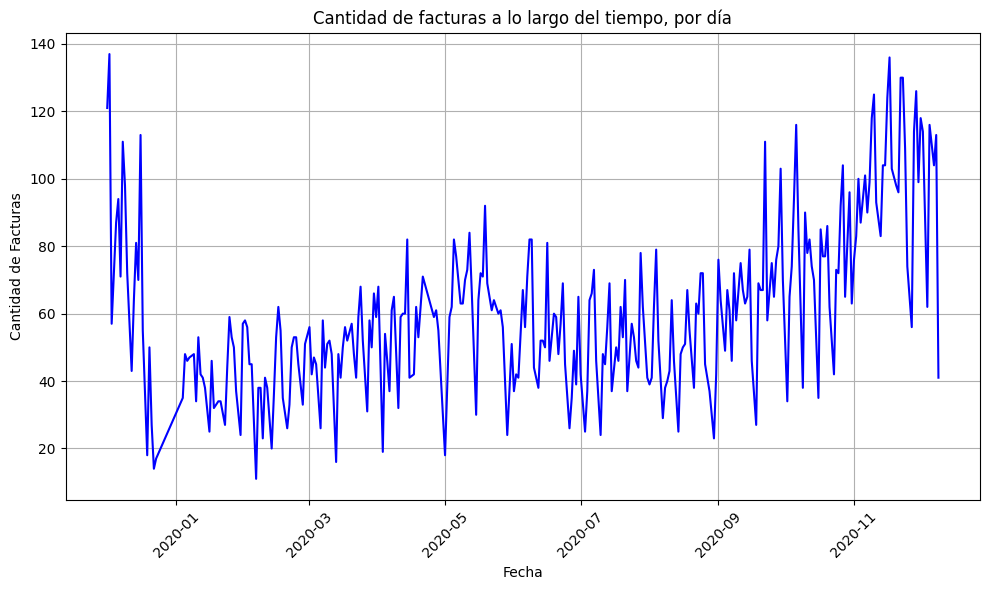

In [37]:
#Trazamos el gráfico

# Gráfico de línea de facturas únicas por día (compras)
plt.figure(figsize=(10, 6))
plt.plot(invoices_per_day, linestyle='-', color='b')
plt.title('Cantidad de facturas a lo largo del tiempo, por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Facturas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Nuevamente observamos el comportamiento alcista a finales e inicios de año. 

In [38]:
# Contar el número de compras por usuario
purchase_counts = data.groupby('customer_id').size().reset_index(name='purchase_count')

# Calcular el número de usuarios con una única compra y con más de una compra
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1].shape[0]
repeat_buyers = purchase_counts[purchase_counts['purchase_count'] > 1].shape[0]
total_buyers = one_time_buyers + repeat_buyers

# Calcular el porcentaje de usuarios que no vuelven a comprar
percentage_one_time_buyers = (one_time_buyers / total_buyers) * 100

# Calcular el factor de stickiness
stickiness_factor = (repeat_buyers / total_buyers) * 100

# Resultados
print(f"Porcentaje de usuarios que no vuelven a comprar: {percentage_one_time_buyers:.2f}%")
print(f"Factor de stickiness: {stickiness_factor:.2f}%")

Porcentaje de usuarios que no vuelven a comprar: 1.66%
Factor de stickiness: 98.34%


No es necesario que hagamos un estudio de tasa de retención, ya que como observamos, tenemos un muy buen factor stickines.
Y como sabemos, el 90% de los clientes han hecho al menos 9 compras.

#### ¿Cuál es el tamaño promedio de compra?

In [39]:
# Agrupar por invoice_no y sumar el amount para cada invoice
grouped_invoices = data.groupby('invoice_no').agg({'amount': 'sum'})

# Calcular el tamaño promedio de compra
average_purchase_size = grouped_invoices['amount'].mean()

print(f'Tamaño promedio de compra: {average_purchase_size}')

Tamaño promedio de compra: 479.4566731765214


### Ahora, calcularemos el LTV.

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392732 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   quantity      392732 non-null  int64         
 2   invoice_date  392732 non-null  datetime64[ns]
 3   customer_id   392732 non-null  object        
 4   region        392732 non-null  object        
 5   amount        392732 non-null  float64       
 6   Month         392732 non-null  int64         
 7   date          392732 non-null  datetime64[ns]
 8   week          392732 non-null  datetime64[ns]
 9   month         392732 non-null  datetime64[ns]
dtypes: datetime64[ns](4), float64(1), int64(2), object(3)
memory usage: 33.0+ MB


In [41]:
#Ahora recuperaremos el mes de la primera compra de cada cliente

# Identificar la primera compra de cada usuario
first_orders = data.groupby('customer_id')['date'].min().reset_index()
first_orders.columns = ['customer_id', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders['first_order_month'] = first_orders['first_order'].astype('datetime64[M]')


# Mostrar los primeros registros del DataFrame resultante
print(first_orders.head())

  customer_id first_order first_order_month
0     12346.0  2020-01-18        2020-01-01
1     12347.0  2019-12-07        2019-12-01
2     12348.0  2019-12-16        2019-12-01
3     12349.0  2020-11-21        2020-11-01
4     12350.0  2020-02-02        2020-02-01


In [42]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

cohort_sizes = first_orders.groupby('first_order_month').agg({'customer_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2019-12-01,885
1,2020-01-01,417
2,2020-02-01,380
3,2020-03-01,452
4,2020-04-01,300


In [43]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de facturas

data_complete = pd.merge(data,first_orders, on='customer_id')
data_complete.sample(20)

,invoice_no,quantity,invoice_date,customer_id,region,amount,Month,date,week,month,first_order,first_order_month
101954,557213,4,2020-06-17 12:16:00,15021.0,United Kingdom,5.00,6,2020-06-17,2020-06-11,2020-06-01,2019-12-08,2019-12-01
308648,560233,2,2020-07-17 11:10:00,16813.0,United Kingdom,5.90,7,2020-07-17,2020-07-16,2020-07-01,2020-05-19,2020-05-01
103511,537773,1,2019-12-08 12:36:00,16016.0,United Kingdom,3.75,12,2019-12-08,2019-12-05,2019-12-01,2019-12-08,2019-12-01
342394,581494,6,2020-12-09 10:13:00,12518.0,Germany,17.70,12,2020-12-09,2020-12-03,2020-12-01,2020-08-21,2020-08-01
200753,541855,2,2020-01-23 14:59:00,13742.0,United Kingdom,2.50,1,2020-01-23,2020-01-23,2020-01-01,2020-01-23,2020-01-01
283093,549185,12,2020-04-07 09:35:00,18272.0,United Kingdom,24.96,4,2020-04-07,2020-04-02,2020-04-01,2020-04-07,2020-04-01
79501,558259,6,2020-06-28 08:19:00,15304.0,United Kingdom,17.70,6,2020-06-28,2020-06-25,2020-06-01,2019-12-06,2019-12-01
184032,577860,12,2020-11-22 11:25:00,16655.0,United Kingdom,10.20,11,2020-11-22,2020-11-19,2020-11-01,2020-01-12,2020-01-01
35968,548796,5,2020-04-04 12:42:00,15752.0,United Kingdom,10.40,4,2020-04-04,2020-04-02,2020-04-01,2019-12-02,2019-12-01
377362,572913,6,2020-10-26 16:21:00,15993.0,United Kingdom,9.90,10,2020-10-26,2020-10-22,2020-10-01,2020-10-26,2020-10-01


In [44]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 

cohorts = data_complete.groupby(['first_order_month','month']).agg({'amount': 'sum'}).reset_index()
cohorts.head()

,first_order_month,month,amount
0,2019-12-01,2019-12-01,570422.73
1,2019-12-01,2020-01-01,275734.47
2,2019-12-01,2020-02-01,233390.47
3,2019-12-01,2020-03-01,302367.44
4,2019-12-01,2020-04-01,204034.38


In [45]:
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes 

report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,month,amount
0,2019-12-01,885,2019-12-01,570422.73
1,2019-12-01,885,2020-01-01,275734.47
2,2019-12-01,885,2020-02-01,233390.47
3,2019-12-01,885,2020-03-01,302367.44
4,2019-12-01,885,2020-04-01,204034.38


In [46]:
#Calculamos la edad de la cohorte en lugar del mes del pedido

report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,month,amount,age
0,2019-12-01,885,2019-12-01,570422.73,0
1,2019-12-01,885,2020-01-01,275734.47,1
2,2019-12-01,885,2020-02-01,233390.47,2
3,2019-12-01,885,2020-03-01,302367.44,3
4,2019-12-01,885,2020-04-01,204034.38,4


In [48]:
#Visualizaremos las cohortes como una tabla dinámica para aclarar las cosas

report['ltv']=report['amount'] / report['n_buyers']
output = report.pivot_table(index='first_order_month', columns='age', values='ltv')


output


age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2019-12-01,644.545458,311.564373,263.718045,341.658124,230.547322,379.789480,354.427299,350.626023,374.012508,533.098452,514.665424,578.916475,209.447424
2020-01-01,701.119520,131.879760,151.455659,171.525396,194.220072,202.552926,168.041607,173.869113,172.351273,267.076019,295.570408,63.280647,NaN
2020-02-01,415.001553,76.151684,107.801237,126.724711,105.497816,89.883342,130.720289,163.928421,145.371947,170.233842,27.895316,NaN,NaN
2020-03-01,441.636438,66.460929,130.438960,94.555487,113.700088,88.412235,143.416261,156.025708,156.742522,28.232522,NaN,NaN,NaN
2020-04-01,406.030170,97.995300,83.428567,80.942633,87.510533,100.344133,95.019667,113.365367,21.106667,NaN,NaN,NaN,NaN
2020-05-01,435.701761,65.639789,70.970880,67.472430,97.720493,115.758239,116.789930,630.930387,NaN,NaN,NaN,NaN,NaN
2020-06-01,559.565289,60.902851,58.282521,127.680000,110.206198,175.748306,33.649669,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,392.874473,62.711011,82.384947,92.510266,101.897979,32.131383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,471.012663,123.868402,209.813491,263.240533,90.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Observando nuestra tabla pivote, nos damos cuenta que el primer mes en el que nuestros clientes realizan su primera compra, es en realidad, el mes más importante del cliclo de vida del cliente. Vemos que a partir del segundo mes, los ingresos por cliente fluctuan bastante, probablemente el periodo entre compras se vuelve más largo. Habrá que analizar los productos con mayor rotación.

In [49]:
output.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2019-12-01,644.55,956.11,1219.83,1561.49,1792.03,2171.82,2526.25,2876.88,3250.89,3783.99,4298.65,4877.57,5087.02
2020-01-01,701.12,833.0,984.45,1155.98,1350.2,1552.75,1720.79,1894.66,2067.02,2334.09,2629.66,2692.94,
2020-02-01,415.00,491.15,598.95,725.68,831.18,921.06,1051.78,1215.71,1361.08,1531.31,1559.21,,
2020-03-01,441.64,508.1,638.54,733.09,846.79,935.2,1078.62,1234.65,1391.39,1419.62,,,
2020-04-01,406.03,504.03,587.45,668.4,755.91,856.25,951.27,1064.64,1085.74,,,,
2020-05-01,435.70,501.34,572.31,639.78,737.51,853.26,970.05,1600.98,,,,,
2020-06-01,559.57,620.47,678.75,806.43,916.64,1092.39,1126.03,,,,,,
2020-07-01,392.87,455.59,537.97,630.48,732.38,764.51,,,,,,,
2020-08-01,471.01,594.88,804.69,1067.94,1158.38,,,,,,,,
